In [1]:
import analysis_nx
import nx_approx_methods
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
g = analysis_nx.load_graph('data/wiki-Vote/wiki-Vote.txt')
lscc_view = analysis_nx.calculate_largest_strongly_connected_comp(g)
lwcc_view = analysis_nx.calculate_largest_weakly_connected_comp(g)

lscc = lscc_view.copy(as_view=False)
lwcc = lwcc_view.copy(as_view=False)

In [6]:
%%time
lscc_distances = analysis_nx.compute_shortest_path_distances_parallel_mp(lscc)
lwcc_distances = analysis_nx.compute_shortest_path_distances_parallel_mp(lwcc)

32 cores used
32 cores used
CPU times: user 24.8 s, sys: 3.53 s, total: 28.3 s
Wall time: 1min 25s


In [5]:
acc_ar = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
#acc_ar = [0.5, 0.6]
s_median_ar, s_mean_ar, s_diam_ar, s_eff_diam_ar = [], [], [], []
w_median_ar, w_mean_ar, w_diam_ar, w_eff_diam_ar = [], [], [], []

In [19]:
%%time
for accuracy in acc_ar:

    print('=====LSCC=====')
    #print('LSCC edges: \t', lscc.num_edges())
    #print('LSCC nodes: \t', lscc.num_vertices())
    print('accuracy is ', accuracy * 100, '% corresponds to ', int(accuracy * lscc.number_of_nodes()), 'sampled number of nodes of LSCC')

    n_samples = int(accuracy * lscc.number_of_nodes())
    bfs_graph_lscc_view = nx_approx_methods.method_2(lscc, n_samples)
    bfs_graph_lscc = bfs_graph_lscc_view.copy(as_view=False)
    lscc_dists = analysis_nx.compute_shortest_path_distances_parallel_mp(bfs_graph_lscc)
    s_median, s_mean, s_diam, s_eff_diam = analysis_nx.compute_stats(lscc_dists)
    s_median_ar.append(s_median)
    s_mean_ar.append(s_mean)
    s_diam_ar.append(s_diam)
    s_eff_diam_ar.append(s_eff_diam)

    print('=====LWCC=====')
    #print('LWCC edges: \t', lwcc.num_edges())
    #print('LWCC nodes: \t', lwcc.num_vertices())
    print('accuracy is ', accuracy * 100, '% corresponds to ', int(accuracy * lwcc.number_of_nodes()), 'sampled number of nodes of LWCC')

    n_samples = int(accuracy * lwcc.number_of_nodes())
    bfs_graph_lwcc_view = nx_approx_methods.method_2(lwcc, n_samples)
    bfs_graph_lwcc = bfs_graph_lwcc_view.copy(as_view=False)
    lwcc_dists = analysis_nx.compute_shortest_path_distances_parallel_mp(bfs_graph_lwcc)
    s_median, s_mean, s_diam, s_eff_diam = analysis_nx.compute_stats(lwcc_dists)
    w_median_ar.append(s_median)
    w_mean_ar.append(s_mean)
    w_diam_ar.append(s_diam)
    w_eff_diam_ar.append(s_eff_diam)

=====LSCC=====
accuracy is  45.0 % corresponds to  585 sampled number of nodes of LSCC
taking 585 samples
32 cores used
=====LWCC=====
accuracy is  45.0 % corresponds to  3179 sampled number of nodes of LWCC
taking 3179 samples
32 cores used
CPU times: user 17min 59s, sys: 16.7 s, total: 18min 16s
Wall time: 19min 33s


In [10]:
s_median_ar = [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
s_mean_ar = [3.6459673923235925, 3.3927035433901813, 3.3102489628637501, 3.2649672431114327, 3.25492312338995, 3.1781144388955727, 3.1570235645426949, 3.1555570564163333, 3.1590285775524403, 3.0576623165762515, 2.9934816137673512, 2.998309313483225, 2.9488289672966488, 2.9451281490649603, 2.940585346761516, 2.9393919618016726]
s_diam_ar = [10, 9, 9, 9, 10, 8, 9, 8, 9, 10, 8, 8, 8, 8, 9, 9]
s_eff_diam_ar = [5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
w_median_ar = [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
w_mean_ar = [3.2864625063961648, 3.2699401117873781, 3.262719645725968, 3.2593251017517981, 3.2568548021088457, 3.253340446458922, 3.2528305157894644, 3.2514247014261795, 3.2505519709080746, 3.2485609580255357, 3.2478057959689282, 3.247494309646406, 3.2472646205294642, 3.2472481168817176, 3.2471704455880741, 3.247128545550348]
w_diam_ar = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
w_eff_diam_ar = [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

In [3]:
# enter exact values for wiki:
s_ex_median, s_ex_mean, s_ex_dia, s_ex_eff_dia = 3, 2.877, 9, 4
w_ex_median, w_ex_mean, w_ex_dia, w_ex_eff_dia = 3, 3.247, 7, 4

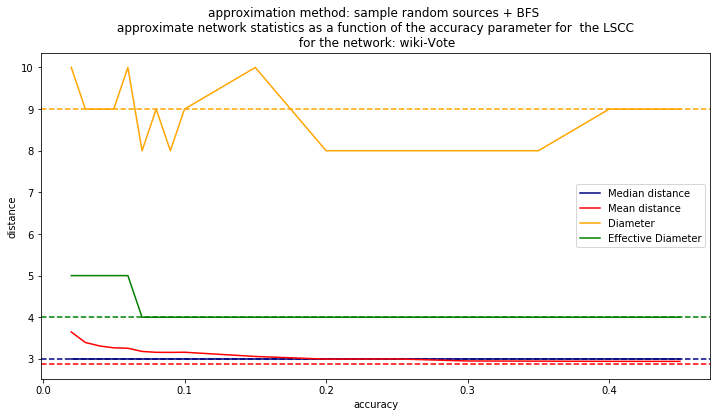

In [13]:
plt.figure(figsize=(12,6))
plt.plot(acc_ar, s_median_ar, label='Median distance', color='navy')
plt.axhline(s_ex_median, linestyle='dashed', color='navy')

plt.plot(acc_ar, s_mean_ar, label='Mean distance', color='r')
plt.axhline(s_ex_mean, linestyle='dashed', color='r')

plt.plot(acc_ar, s_diam_ar, label='Diameter', color='orange')
plt.axhline(s_ex_dia, linestyle='dashed', color='orange')

plt.plot(acc_ar, s_eff_diam_ar, label='Effective Diameter', color='g')
plt.axhline(s_ex_eff_dia, linestyle='dashed', color='g')

plt.legend()
title = 'approximation method: sample random sources + BFS \n approximate network statistics as a function of the accuracy parameter for  the LSCC \n for the network: wiki-Vote'
plt.title(title)
plt.xlabel('accuracy')
plt.ylabel('distance')
plt.savefig('2_2_' + 'wiki-Vote' + '_lscc', dpi=300, bordes='tight')

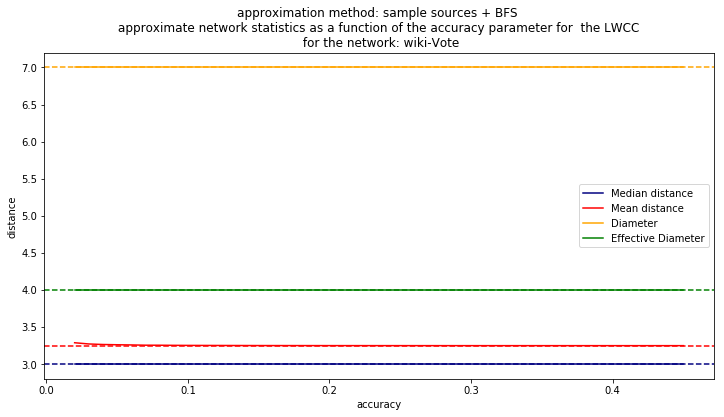

In [14]:
plt.figure(figsize=(12,6))
plt.plot(acc_ar, w_median_ar, label='Median distance', color='navy')
plt.axhline(w_ex_median, linestyle='dashed', color='navy')

plt.plot(acc_ar, w_mean_ar, label='Mean distance', color='r')
plt.axhline(w_ex_mean, linestyle='dashed', color='r')

plt.plot(acc_ar, w_diam_ar, label='Diameter', color='orange')
plt.axhline(w_ex_dia, linestyle='dashed', color='orange')

plt.plot(acc_ar, w_eff_diam_ar, label='Effective Diameter', color='g')
plt.axhline(w_ex_eff_dia, linestyle='dashed', color='g')
plt.legend()
title = 'approximation method: sample sources + BFS \n approximate network statistics as a function of the accuracy parameter for  the LWCC \n for the network: wiki-Vote'
plt.title(title)
plt.xlabel('accuracy')
plt.ylabel('distance')
plt.savefig('2_2_' + 'wiki-Vote' + '_lwcc', dpi=300, bordes='tight')